# House Price Prediction using Ridge and Lasso Regression
## Surprise Housing - Australian Market Analysis

### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. We need to build a regression model using regularization to predict house prices.

### Objectives
1. Identify significant variables in predicting house prices
2. Understand how well these variables describe the price
3. Determine optimal lambda (alpha) values for Ridge and Lasso regression

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For model building
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('ggplot')

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading and Initial Exploration

In [3]:
# Load the dataset
df = pd.read_csv('train.csv')

# Display basic information
print(f"Dataset Shape: {df.shape}")
print(f"\nNumber of Features: {df.shape[1]}")
print(f"Number of Records: {df.shape[0]}")

# Display first few rows
df.head()

Dataset Shape: (1460, 81)

Number of Features: 81
Number of Records: 1460


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check data types and missing values
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [5]:
# Statistical summary
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Check for missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
print(f"\nColumns with missing values: {len(missing_data)}")
missing_data


Columns with missing values: 19


,Column,Missing_Count,Missing_Percentage
PoolQC,PoolQC,1453,99.520548
MiscFeature,MiscFeature,1406,96.301370
Alley,Alley,1369,93.767123
Fence,Fence,1179,80.753425
MasVnrType,MasVnrType,872,59.726027
FireplaceQu,FireplaceQu,690,47.260274
LotFrontage,LotFrontage,259,17.739726
GarageType,GarageType,81,5.547945
GarageYrBlt,GarageYrBlt,81,5.547945
GarageFinish,GarageFinish,81,5.547945


## 2. Data Quality Checks and Cleaning

In [7]:
# Check for duplicate records
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for duplicate IDs
duplicate_ids = df['Id'].duplicated().sum()
print(f"Number of duplicate IDs: {duplicate_ids}")

Number of duplicate rows: 0
Number of duplicate IDs: 0


In [8]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove Id and SalePrice from numerical features
numerical_features.remove('Id')
if 'SalePrice' in numerical_features:
    numerical_features.remove('SalePrice')

print(f"Number of Numerical Features: {len(numerical_features)}")
print(f"Number of Categorical Features: {len(categorical_features)}")
print(f"\nNumerical Features: {numerical_features[:10]}...")
print(f"\nCategorical Features: {categorical_features[:10]}...")

Number of Numerical Features: 36
Number of Categorical Features: 43

Numerical Features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2']...

Categorical Features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1']...


In [9]:
# Handle missing values based on data description
# For many features, 'NA' means 'None' or 'Not Applicable'

# Create a copy for processing
df_clean = df.copy()

# Categorical features where NA means 'None'
categorical_na_as_none = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                          'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                          'PoolQC', 'Fence', 'MiscFeature']

for col in categorical_na_as_none:
    if col in df_clean.columns:
        df_clean[col].fillna('None', inplace=True)

# Numerical features where NA means 0
numerical_na_as_zero = ['GarageYrBlt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']

for col in numerical_na_as_zero:
    if col in df_clean.columns:
        df_clean[col].fillna(0, inplace=True)

# For LotFrontage, fill with median based on Neighborhood
df_clean['LotFrontage'] = df_clean.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

# For MasVnrType, fill with 'None'
if 'MasVnrType' in df_clean.columns:
    df_clean['MasVnrType'].fillna('None', inplace=True)

# For Electrical, fill with mode
if 'Electrical' in df_clean.columns:
    df_clean['Electrical'].fillna(df_clean['Electrical'].mode()[0], inplace=True)

print("Missing values after imputation:")
print(df_clean.isnull().sum().sum())

Missing values after imputation:
0


## 3. Exploratory Data Analysis (EDA)

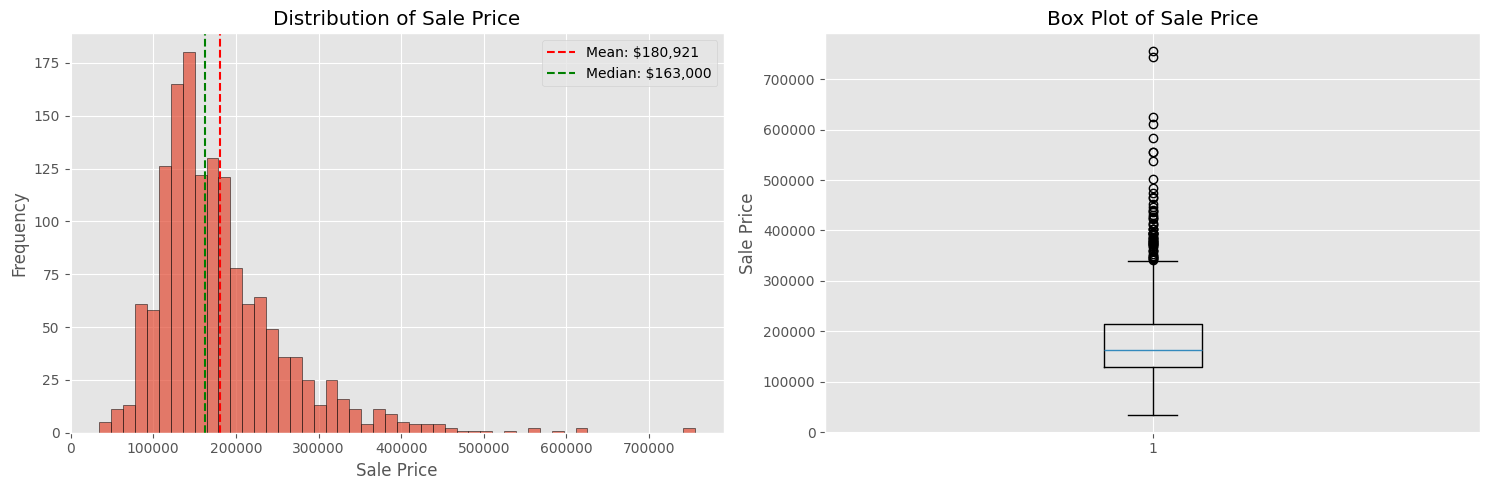

Sale Price Statistics:
Mean: $180,921.20
Median: $163,000.00
Std Dev: $79,442.50
Min: $34,900.00
Max: $755,000.00


In [10]:
# Distribution of target variable (SalePrice)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df_clean['SalePrice'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Sale Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Sale Price')
axes[0].axvline(df_clean['SalePrice'].mean(), color='red', linestyle='--', label=f"Mean: ${df_clean['SalePrice'].mean():,.0f}")
axes[0].axvline(df_clean['SalePrice'].median(), color='green', linestyle='--', label=f"Median: ${df_clean['SalePrice'].median():,.0f}")
axes[0].legend()

# Box plot
axes[1].boxplot(df_clean['SalePrice'])
axes[1].set_ylabel('Sale Price')
axes[1].set_title('Box Plot of Sale Price')

plt.tight_layout()
plt.show()

print(f"Sale Price Statistics:")
print(f"Mean: ${df_clean['SalePrice'].mean():,.2f}")
print(f"Median: ${df_clean['SalePrice'].median():,.2f}")
print(f"Std Dev: ${df_clean['SalePrice'].std():,.2f}")
print(f"Min: ${df_clean['SalePrice'].min():,.2f}")
print(f"Max: ${df_clean['SalePrice'].max():,.2f}")

In [11]:
# Check skewness of SalePrice
from scipy import stats

print(f"Skewness of SalePrice: {df_clean['SalePrice'].skew():.3f}")
print(f"Kurtosis of SalePrice: {df_clean['SalePrice'].kurtosis():.3f}")

# Apply log transformation if highly skewed
if df_clean['SalePrice'].skew() > 0.75:
    df_clean['SalePrice_log'] = np.log(df_clean['SalePrice'])
    print(f"\nSkewness after log transformation: {df_clean['SalePrice_log'].skew():.3f}")

Skewness of SalePrice: 1.883
Kurtosis of SalePrice: 6.536

Skewness after log transformation: 0.121


Top 15 features correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.349876
WoodDeckSF      0.324413
Name: SalePrice, dtype: float64


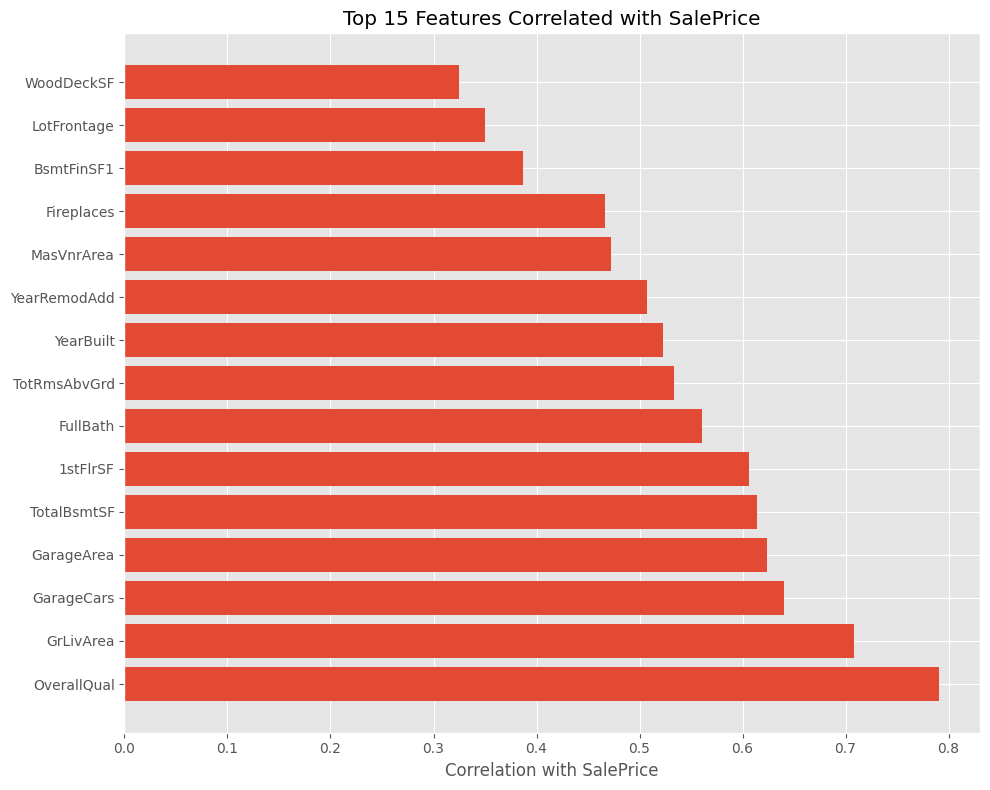

In [12]:
# Correlation of numerical features with SalePrice
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Id' in numerical_cols:
    numerical_cols.remove('Id')
if 'SalePrice_log' in numerical_cols:
    numerical_cols.remove('SalePrice_log')

correlations = df_clean[numerical_cols].corr()['SalePrice'].sort_values(ascending=False)

print("Top 15 features correlated with SalePrice:")
print(correlations.head(16))  # 16 because SalePrice itself will be first

# Visualize top correlations
plt.figure(figsize=(10, 8))
top_corr = correlations.head(16).drop('SalePrice')
plt.barh(range(len(top_corr)), top_corr.values)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Correlation with SalePrice')
plt.title('Top 15 Features Correlated with SalePrice')
plt.tight_layout()
plt.show()

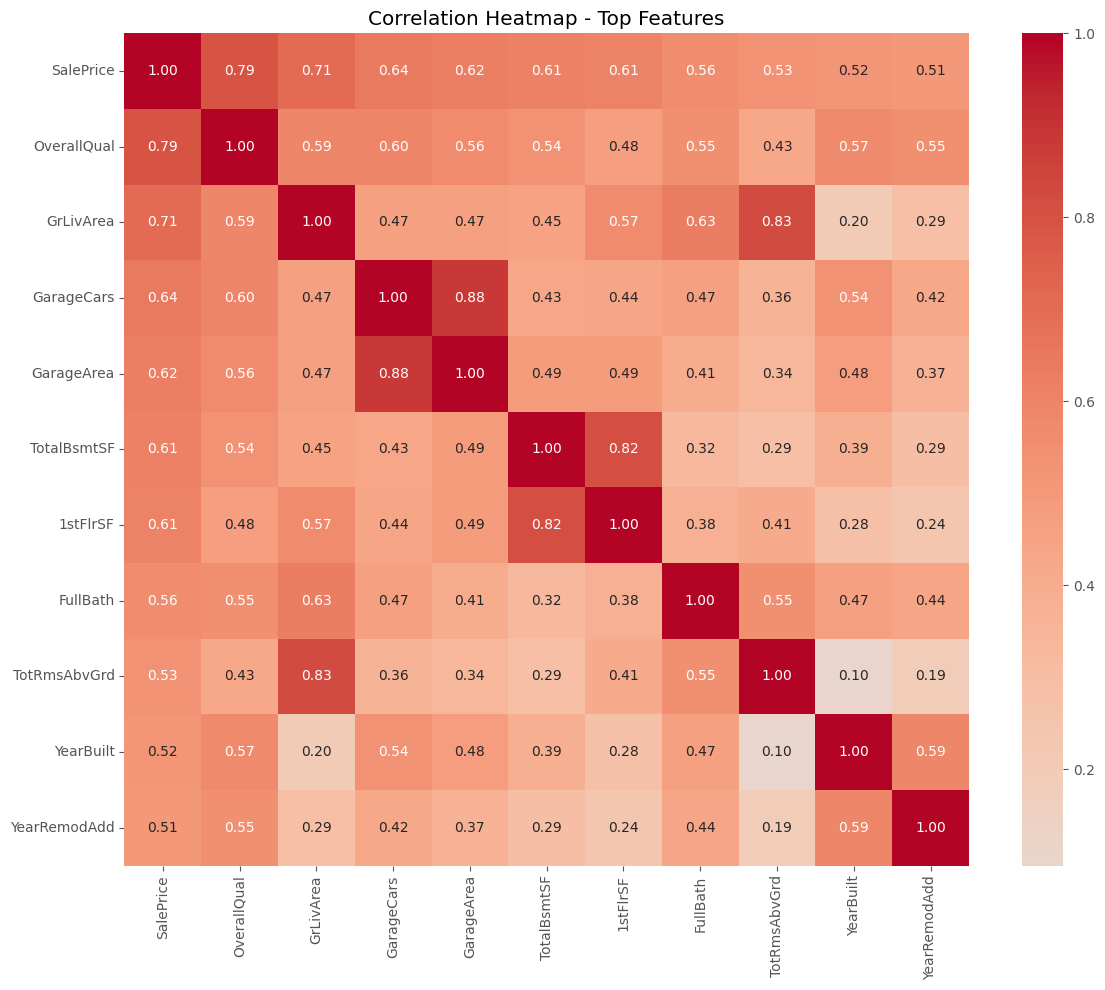

In [13]:
# Correlation heatmap for top features
top_features = correlations.head(11).index.tolist()  # Top 10 + SalePrice

plt.figure(figsize=(12, 10))
sns.heatmap(df_clean[top_features].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - Top Features')
plt.tight_layout()
plt.show()

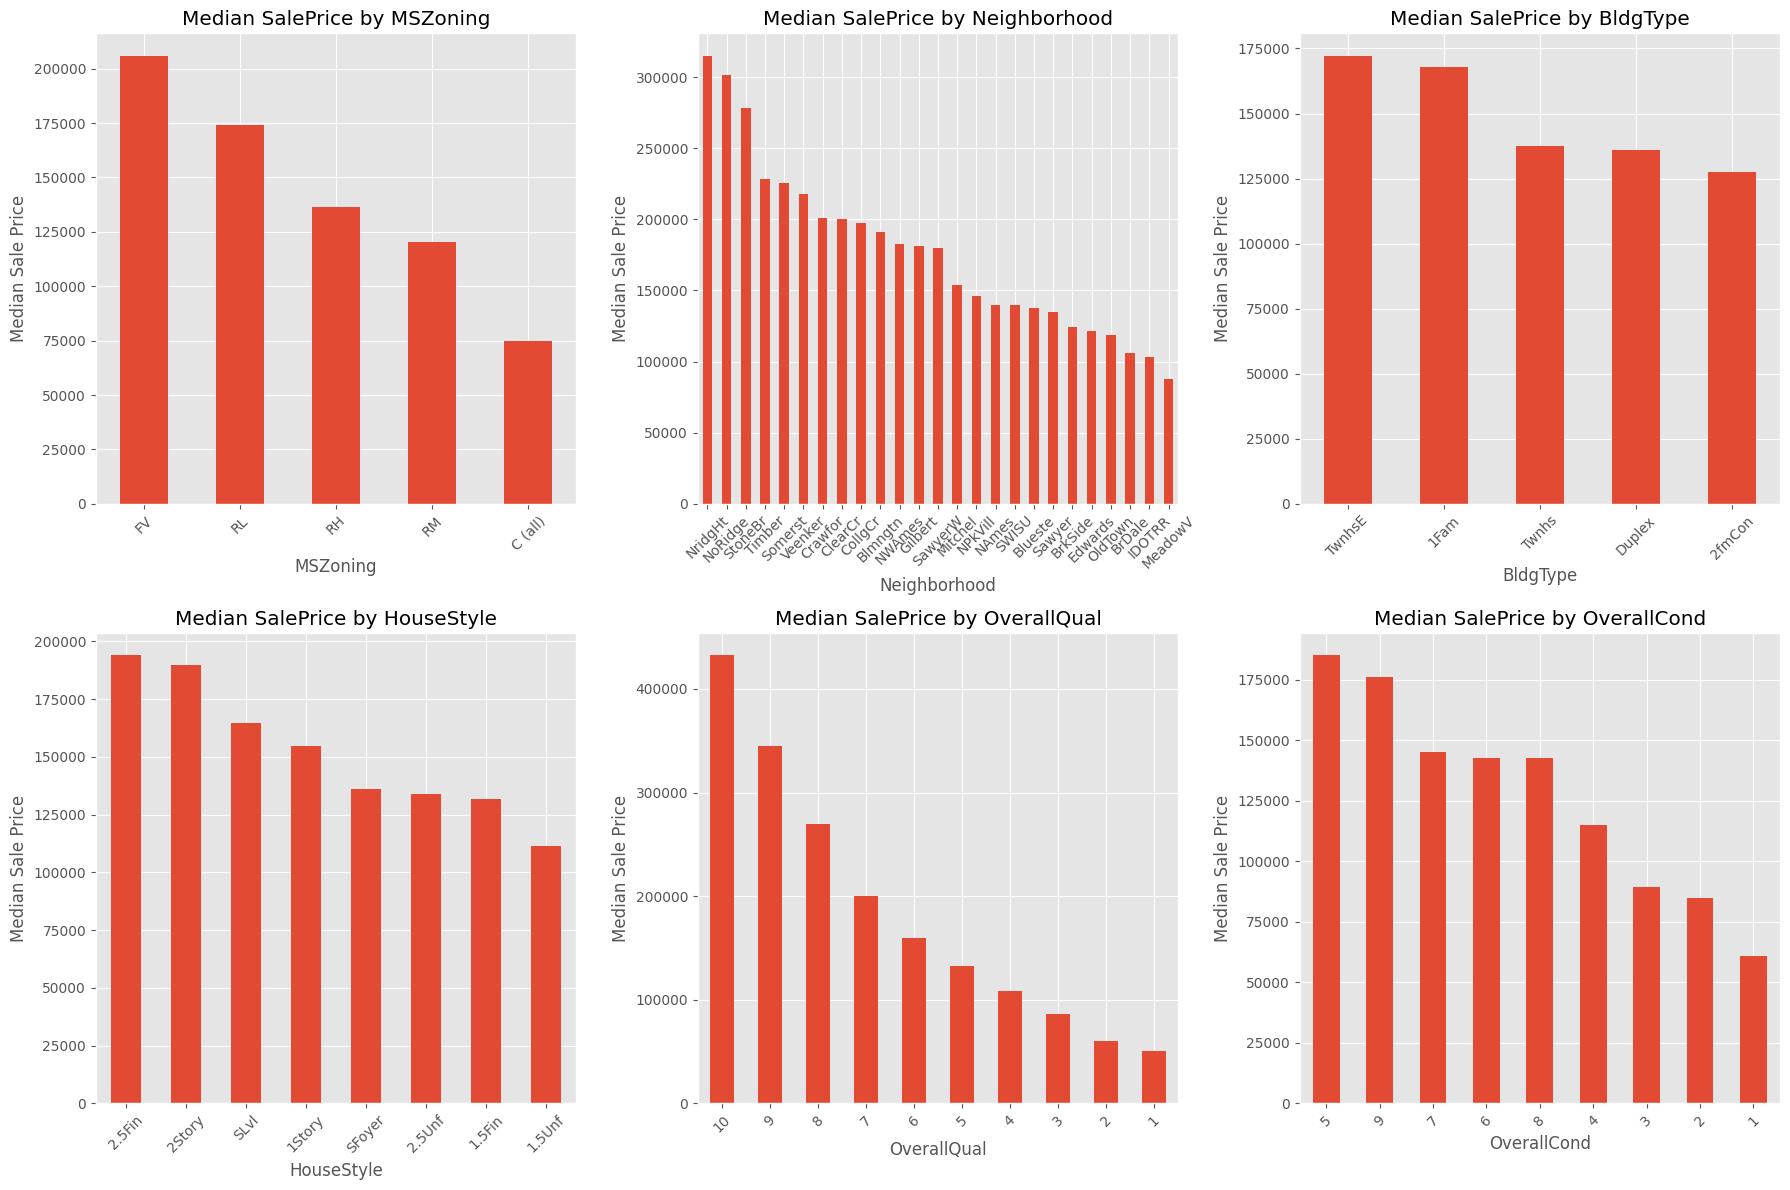

In [14]:
# Analyze key categorical variables
key_categorical = ['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(key_categorical):
    if col in df_clean.columns:
        df_clean.groupby(col)['SalePrice'].median().sort_values(ascending=False).plot(kind='bar', ax=axes[idx])
        axes[idx].set_title(f'Median SalePrice by {col}')
        axes[idx].set_ylabel('Median Sale Price')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [15]:
# Check for outliers in numerical features
# Using the 'SalePrice' to identify potential outliers

Q1 = df_clean['SalePrice'].quantile(0.25)
Q3 = df_clean['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_clean[(df_clean['SalePrice'] < lower_bound) | (df_clean['SalePrice'] > upper_bound)]
print(f"Number of outliers in SalePrice: {len(outliers)}")
print(f"Percentage of outliers: {len(outliers)/len(df_clean)*100:.2f}%")

Number of outliers in SalePrice: 61
Percentage of outliers: 4.18%


## 4. Feature Engineering

In [16]:
# Create new features that might be useful

# Total square footage
df_clean['TotalSF'] = df_clean['TotalBsmtSF'] + df_clean['1stFlrSF'] + df_clean['2ndFlrSF']

# Total bathrooms
df_clean['TotalBath'] = df_clean['FullBath'] + 0.5*df_clean['HalfBath'] + df_clean['BsmtFullBath'] + 0.5*df_clean['BsmtHalfBath']

# House age
df_clean['HouseAge'] = df_clean['YrSold'] - df_clean['YearBuilt']

# Remodeling age
df_clean['RemodelAge'] = df_clean['YrSold'] - df_clean['YearRemodAdd']

# Is the house remodeled
df_clean['IsRemodeled'] = (df_clean['YearBuilt'] != df_clean['YearRemodAdd']).astype(int)

# Total porch area
df_clean['TotalPorchSF'] = df_clean['OpenPorchSF'] + df_clean['EnclosedPorch'] + df_clean['3SsnPorch'] + df_clean['ScreenPorch']

# Has pool
df_clean['HasPool'] = (df_clean['PoolArea'] > 0).astype(int)

# Has garage
df_clean['HasGarage'] = (df_clean['GarageArea'] > 0).astype(int)

# Has basement
df_clean['HasBasement'] = (df_clean['TotalBsmtSF'] > 0).astype(int)

# Has fireplace
df_clean['HasFireplace'] = (df_clean['Fireplaces'] > 0).astype(int)

print("New features created successfully!")
print(f"Total features now: {df_clean.shape[1]}")

New features created successfully!
Total features now: 92


## 5. Data Preparation for Modeling

In [17]:
# Create dummy variables for categorical features
# First, let's identify categorical columns again after our transformations

categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
print(f"Number of categorical columns: {len(categorical_cols)}")

# Create dummy variables
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

print(f"\nShape after encoding: {df_encoded.shape}")
print(f"Total features after encoding: {df_encoded.shape[1]}")

Number of categorical columns: 43

Shape after encoding: (1460, 272)
Total features after encoding: 272


In [18]:
# Prepare X and y
# Drop Id and SalePrice_log if it exists
columns_to_drop = ['Id', 'SalePrice']
if 'SalePrice_log' in df_encoded.columns:
    columns_to_drop.append('SalePrice_log')

X = df_encoded.drop(columns=columns_to_drop)
y = df_clean['SalePrice']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Check for any remaining NaN values
print(f"\nNaN values in X: {X.isnull().sum().sum()}")
print(f"NaN values in y: {y.isnull().sum()}")

X shape: (1460, 269)
y shape: (1460,)

NaN values in X: 0
NaN values in y: 0


In [19]:
# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

Training set size: 1022 samples
Testing set size: 438 samples
Number of features: 269


In [20]:
# Feature Scaling - Important for Ridge and Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier interpretation
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Feature scaling completed!")

Feature scaling completed!


## 6. Model Building - Linear Regression (Baseline)

In [21]:
# Build baseline Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_lr = lr.predict(X_train_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)

# Evaluation metrics
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))

print("Linear Regression (Baseline) Results:")
print(f"Training R² Score: {train_r2_lr:.4f}")
print(f"Testing R² Score: {test_r2_lr:.4f}")
print(f"Training RMSE: ${train_rmse_lr:,.2f}")
print(f"Testing RMSE: ${test_rmse_lr:,.2f}")

Linear Regression (Baseline) Results:
Training R² Score: 0.9409
Testing R² Score: 0.0341
Training RMSE: $18,857.74
Testing RMSE: $82,096.64


## 7. Ridge Regression with Hyperparameter Tuning

In [22]:
# Define range of alpha values to test
alphas_ridge = [0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 50, 100, 200, 500, 1000]

# Use GridSearchCV to find optimal alpha
ridge_cv = GridSearchCV(
    estimator=Ridge(),
    param_grid={'alpha': alphas_ridge},
    cv=5,
    scoring='r2',
    n_jobs=-1
)

ridge_cv.fit(X_train_scaled, y_train)

print(f"Optimal Alpha for Ridge: {ridge_cv.best_params_['alpha']}")
print(f"Best Cross-Validation R² Score: {ridge_cv.best_score_:.4f}")

Optimal Alpha for Ridge: 500
Best Cross-Validation R² Score: 0.7747


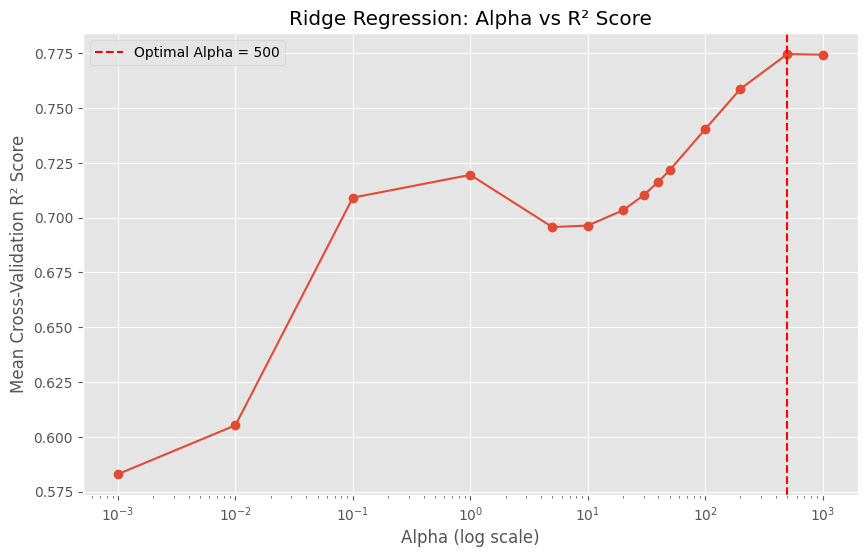

In [23]:
# Plot alpha vs R² score for Ridge
ridge_results = pd.DataFrame(ridge_cv.cv_results_)

plt.figure(figsize=(10, 6))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'], marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Cross-Validation R² Score')
plt.title('Ridge Regression: Alpha vs R² Score')
plt.axvline(ridge_cv.best_params_['alpha'], color='red', linestyle='--', label=f"Optimal Alpha = {ridge_cv.best_params_['alpha']}")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Train Ridge with optimal alpha
optimal_alpha_ridge = ridge_cv.best_params_['alpha']
ridge_optimal = Ridge(alpha=optimal_alpha_ridge)
ridge_optimal.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_ridge = ridge_optimal.predict(X_train_scaled)
y_test_pred_ridge = ridge_optimal.predict(X_test_scaled)

# Evaluation metrics
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

print(f"Ridge Regression (Alpha = {optimal_alpha_ridge}) Results:")
print(f"Training R² Score: {train_r2_ridge:.4f}")
print(f"Testing R² Score: {test_r2_ridge:.4f}")
print(f"Training RMSE: ${train_rmse_ridge:,.2f}")
print(f"Testing RMSE: ${test_rmse_ridge:,.2f}")

Ridge Regression (Alpha = 500) Results:
Training R² Score: 0.8875
Testing R² Score: 0.8605
Training RMSE: $26,026.43
Testing RMSE: $31,201.24


In [25]:
# Get top features from Ridge model
ridge_coef = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge_optimal.coef_
})
ridge_coef['Abs_Coefficient'] = abs(ridge_coef['Coefficient'])
ridge_coef_sorted = ridge_coef.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 20 Most Important Features (Ridge):")
print(ridge_coef_sorted.head(20))


Top 20 Most Important Features (Ridge):
                  Feature  Coefficient  Abs_Coefficient
3             OverallQual  8142.104256      8142.104256
246             PoolQC_Gd -6513.570868      6513.570868
15              GrLivArea  5810.245499      5810.245499
81   Neighborhood_NridgHt  5642.465368      5642.465368
36                TotalSF  5087.223348      5087.223348
22           TotRmsAbvGrd  4699.759453      4699.759453
80   Neighborhood_NoRidge  4693.491313      4693.491313
25             GarageCars  4672.803759      4672.803759
87   Neighborhood_StoneBr  4497.498990      4497.498990
101       Condition2_PosN -3791.009081      3791.009081
26             GarageArea  3775.363108      3775.363108
173           BsmtQual_Gd -3749.075730      3749.075730
13               2ndFlrSF  3712.675313      3712.675313
12               1stFlrSF  3677.682496      3677.682496
180       BsmtExposure_Gd  3454.267770      3454.267770
212        KitchenQual_TA -3353.830550      3353.830550
7      

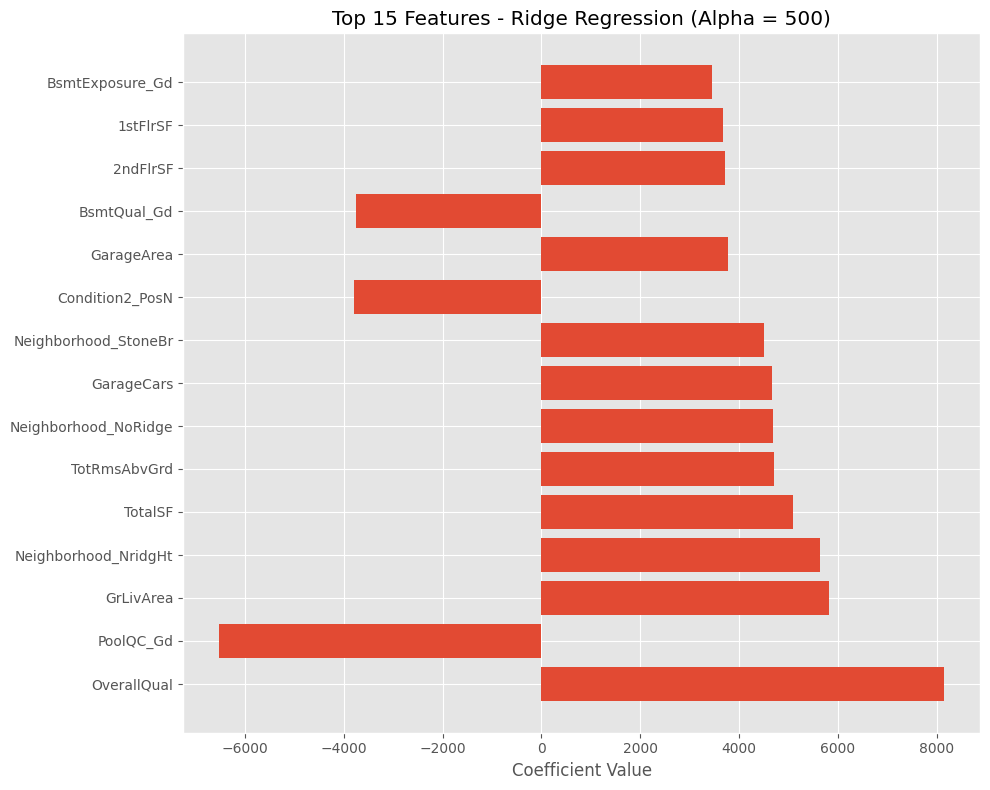

In [26]:
# Visualize top 15 features from Ridge
top_15_ridge = ridge_coef_sorted.head(15)

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_15_ridge)), top_15_ridge['Coefficient'].values)
plt.yticks(range(len(top_15_ridge)), top_15_ridge['Feature'].values)
plt.xlabel('Coefficient Value')
plt.title(f'Top 15 Features - Ridge Regression (Alpha = {optimal_alpha_ridge})')
plt.tight_layout()
plt.show()

## 8. Lasso Regression with Hyperparameter Tuning

In [27]:
# Define range of alpha values to test for Lasso
alphas_lasso = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

# Use GridSearchCV to find optimal alpha
lasso_cv = GridSearchCV(
    estimator=Lasso(max_iter=10000),
    param_grid={'alpha': alphas_lasso},
    cv=5,
    scoring='r2',
    n_jobs=-1
)

lasso_cv.fit(X_train_scaled, y_train)

print(f"Optimal Alpha for Lasso: {lasso_cv.best_params_['alpha']}")
print(f"Best Cross-Validation R² Score: {lasso_cv.best_score_:.4f}")

Optimal Alpha for Lasso: 100
Best Cross-Validation R² Score: 0.7030


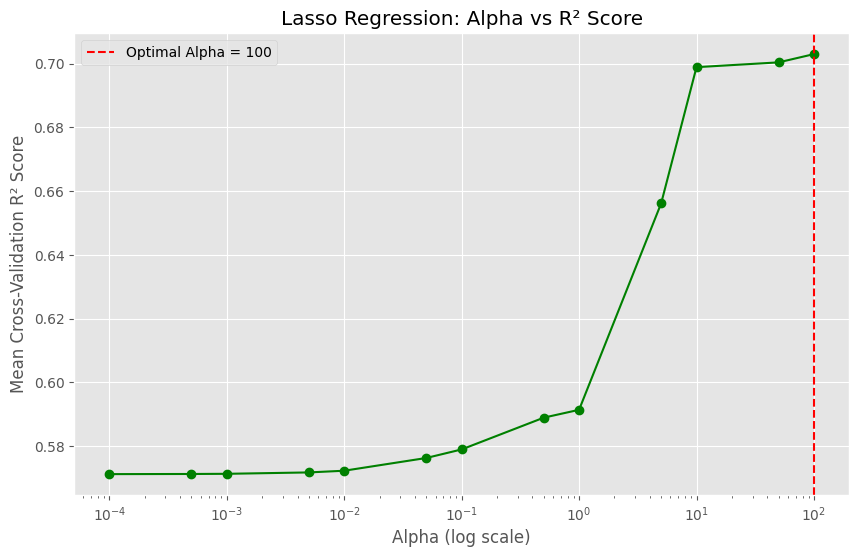

In [28]:
# Plot alpha vs R² score for Lasso
lasso_results = pd.DataFrame(lasso_cv.cv_results_)

plt.figure(figsize=(10, 6))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'], marker='o', color='green')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Cross-Validation R² Score')
plt.title('Lasso Regression: Alpha vs R² Score')
plt.axvline(lasso_cv.best_params_['alpha'], color='red', linestyle='--', label=f"Optimal Alpha = {lasso_cv.best_params_['alpha']}")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Train Lasso with optimal alpha
optimal_alpha_lasso = lasso_cv.best_params_['alpha']
lasso_optimal = Lasso(alpha=optimal_alpha_lasso, max_iter=10000)
lasso_optimal.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_lasso = lasso_optimal.predict(X_train_scaled)
y_test_pred_lasso = lasso_optimal.predict(X_test_scaled)

# Evaluation metrics
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)
train_rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

print(f"Lasso Regression (Alpha = {optimal_alpha_lasso}) Results:")
print(f"Training R² Score: {train_r2_lasso:.4f}")
print(f"Testing R² Score: {test_r2_lasso:.4f}")
print(f"Training RMSE: ${train_rmse_lasso:,.2f}")
print(f"Testing RMSE: ${test_rmse_lasso:,.2f}")

# Check number of non-zero coefficients
non_zero_coef = np.sum(lasso_optimal.coef_ != 0)
print(f"\nNumber of features selected (non-zero coefficients): {non_zero_coef} out of {len(lasso_optimal.coef_)}")

Lasso Regression (Alpha = 100) Results:
Training R² Score: 0.9351
Testing R² Score: 0.8458
Training RMSE: $19,763.35
Testing RMSE: $32,801.66

Number of features selected (non-zero coefficients): 209 out of 269


In [30]:
# Get top features from Lasso model
lasso_coef = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_optimal.coef_
})
lasso_coef['Abs_Coefficient'] = abs(lasso_coef['Coefficient'])
lasso_coef_sorted = lasso_coef.sort_values('Abs_Coefficient', ascending=False)

# Filter only non-zero coefficients
lasso_coef_nonzero = lasso_coef_sorted[lasso_coef_sorted['Coefficient'] != 0]

print("\nTop 20 Most Important Features (Lasso):")
print(lasso_coef_nonzero.head(20))


Top 20 Most Important Features (Lasso):
                  Feature   Coefficient  Abs_Coefficient
32               PoolArea  85370.628194     85370.628194
42                HasPool -72222.085140     72222.085140
246             PoolQC_Gd -23000.139016     23000.139016
36                TotalSF  16186.323610     16186.323610
3             OverallQual  10948.493639     10948.493639
212        KitchenQual_TA -10840.307030     10840.307030
173           BsmtQual_Gd -10608.680351     10608.680351
211        KitchenQual_Gd -10135.972497     10135.972497
175           BsmtQual_TA  -9870.193862      9870.193862
101       Condition2_PosN  -9048.973955      9048.973955
5               YearBuilt   8206.814642      8206.814642
162          ExterQual_TA  -7817.372250      7817.372250
161          ExterQual_Gd  -7815.233372      7815.233372
15              GrLivArea   7528.123705      7528.123705
13               2ndFlrSF   7474.022463      7474.022463
87   Neighborhood_StoneBr   6159.695045      61

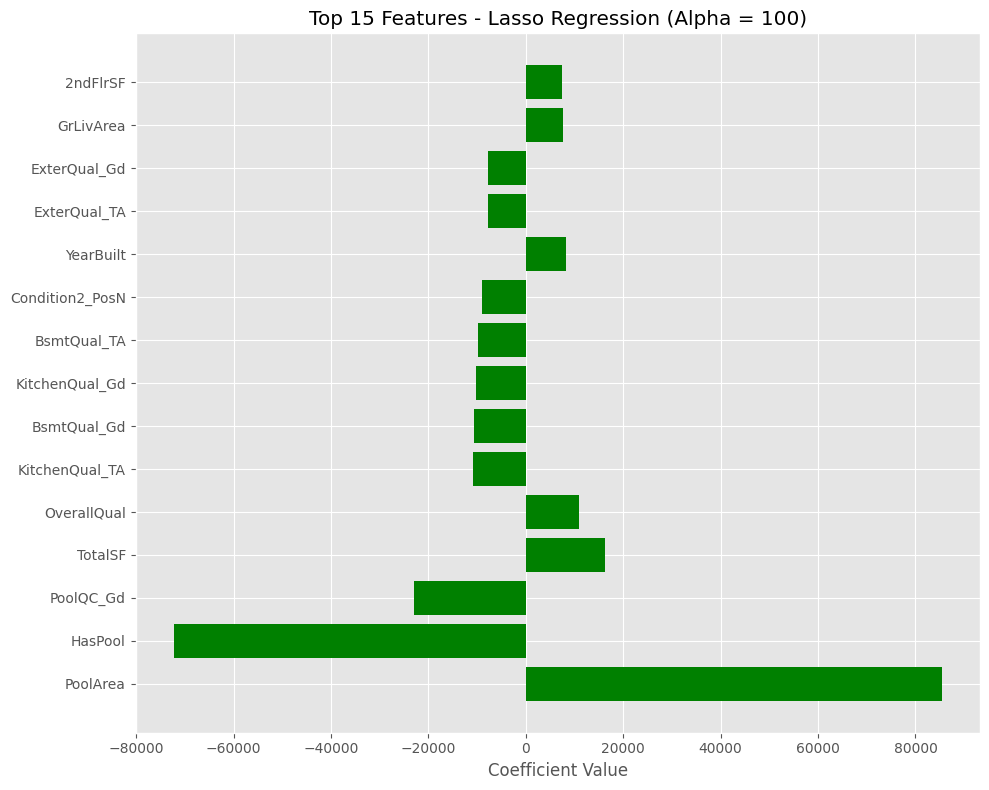

In [31]:
# Visualize top 15 features from Lasso
top_15_lasso = lasso_coef_nonzero.head(15)

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_15_lasso)), top_15_lasso['Coefficient'].values, color='green')
plt.yticks(range(len(top_15_lasso)), top_15_lasso['Feature'].values)
plt.xlabel('Coefficient Value')
plt.title(f'Top 15 Features - Lasso Regression (Alpha = {optimal_alpha_lasso})')
plt.tight_layout()
plt.show()

## 9. Model Comparison and Analysis

In [32]:
# Compare all models
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'Train R²': [train_r2_lr, train_r2_ridge, train_r2_lasso],
    'Test R²': [test_r2_lr, test_r2_ridge, test_r2_lasso],
    'Train RMSE': [train_rmse_lr, train_rmse_ridge, train_rmse_lasso],
    'Test RMSE': [test_rmse_lr, test_rmse_ridge, test_rmse_lasso],
    'Alpha': ['N/A', optimal_alpha_ridge, optimal_alpha_lasso]
})

print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
print(comparison.to_string(index=False))
print("="*80)


MODEL COMPARISON
            Model  Train R²  Test R²   Train RMSE    Test RMSE Alpha
Linear Regression  0.940914 0.034140 18857.737278 82096.640611   N/A
 Ridge Regression  0.887453 0.860489 26026.426310 31201.241733   500
 Lasso Regression  0.935103 0.845810 19763.349462 32801.661990   100


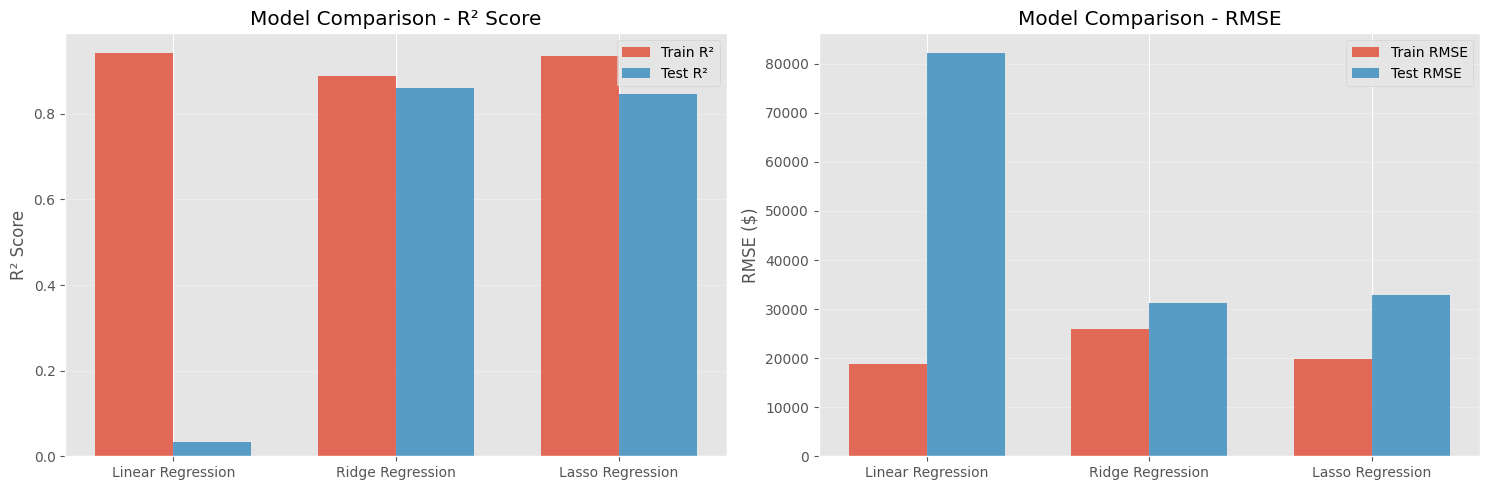

In [33]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# R² Score comparison
x = np.arange(len(comparison['Model']))
width = 0.35

axes[0].bar(x - width/2, comparison['Train R²'], width, label='Train R²', alpha=0.8)
axes[0].bar(x + width/2, comparison['Test R²'], width, label='Test R²', alpha=0.8)
axes[0].set_ylabel('R² Score')
axes[0].set_title('Model Comparison - R² Score')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison['Model'])
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# RMSE comparison
axes[1].bar(x - width/2, comparison['Train RMSE'], width, label='Train RMSE', alpha=0.8)
axes[1].bar(x + width/2, comparison['Test RMSE'], width, label='Test RMSE', alpha=0.8)
axes[1].set_ylabel('RMSE ($)')
axes[1].set_title('Model Comparison - RMSE')
axes[1].set_xticks(x)
axes[1].set_xticklabels(comparison['Model'])
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

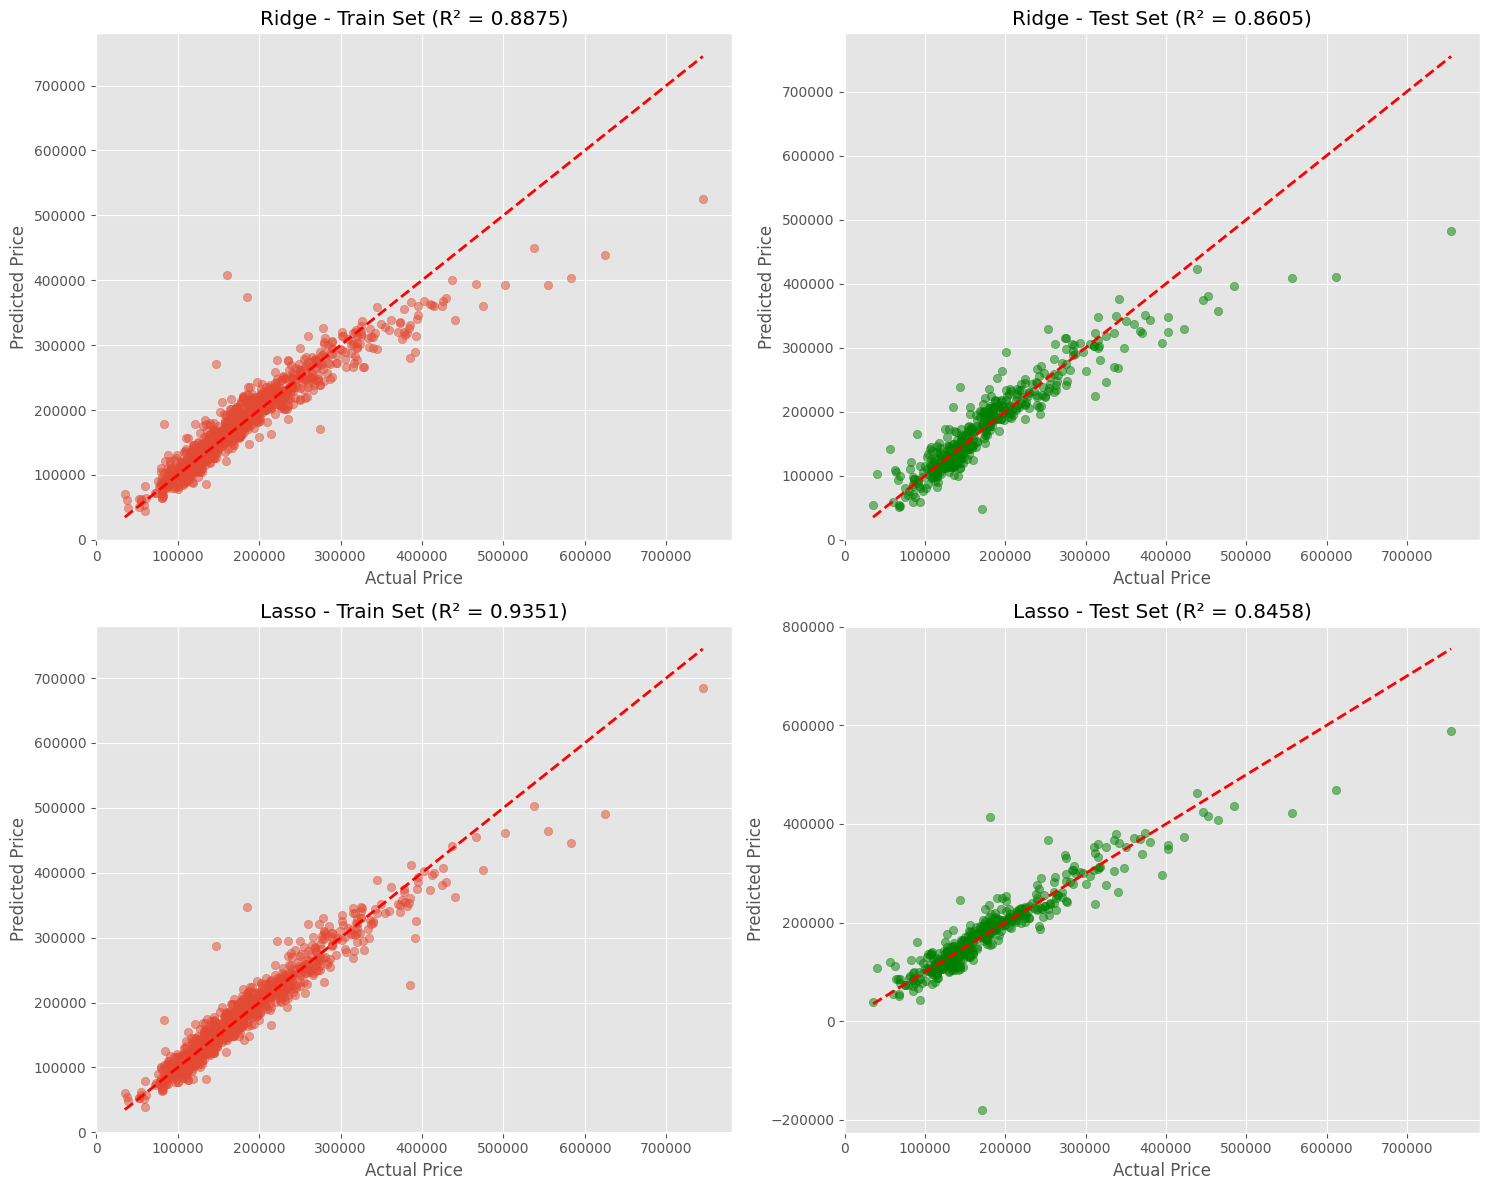

In [34]:
# Residual plots for best model
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Ridge - Actual vs Predicted (Train)
axes[0, 0].scatter(y_train, y_train_pred_ridge, alpha=0.5)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Price')
axes[0, 0].set_ylabel('Predicted Price')
axes[0, 0].set_title(f'Ridge - Train Set (R² = {train_r2_ridge:.4f})')

# Ridge - Actual vs Predicted (Test)
axes[0, 1].scatter(y_test, y_test_pred_ridge, alpha=0.5, color='green')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Price')
axes[0, 1].set_ylabel('Predicted Price')
axes[0, 1].set_title(f'Ridge - Test Set (R² = {test_r2_ridge:.4f})')

# Lasso - Actual vs Predicted (Train)
axes[1, 0].scatter(y_train, y_train_pred_lasso, alpha=0.5)
axes[1, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[1, 0].set_xlabel('Actual Price')
axes[1, 0].set_ylabel('Predicted Price')
axes[1, 0].set_title(f'Lasso - Train Set (R² = {train_r2_lasso:.4f})')

# Lasso - Actual vs Predicted (Test)
axes[1, 1].scatter(y_test, y_test_pred_lasso, alpha=0.5, color='green')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('Actual Price')
axes[1, 1].set_ylabel('Predicted Price')
axes[1, 1].set_title(f'Lasso - Test Set (R² = {test_r2_lasso:.4f})')

plt.tight_layout()
plt.show()

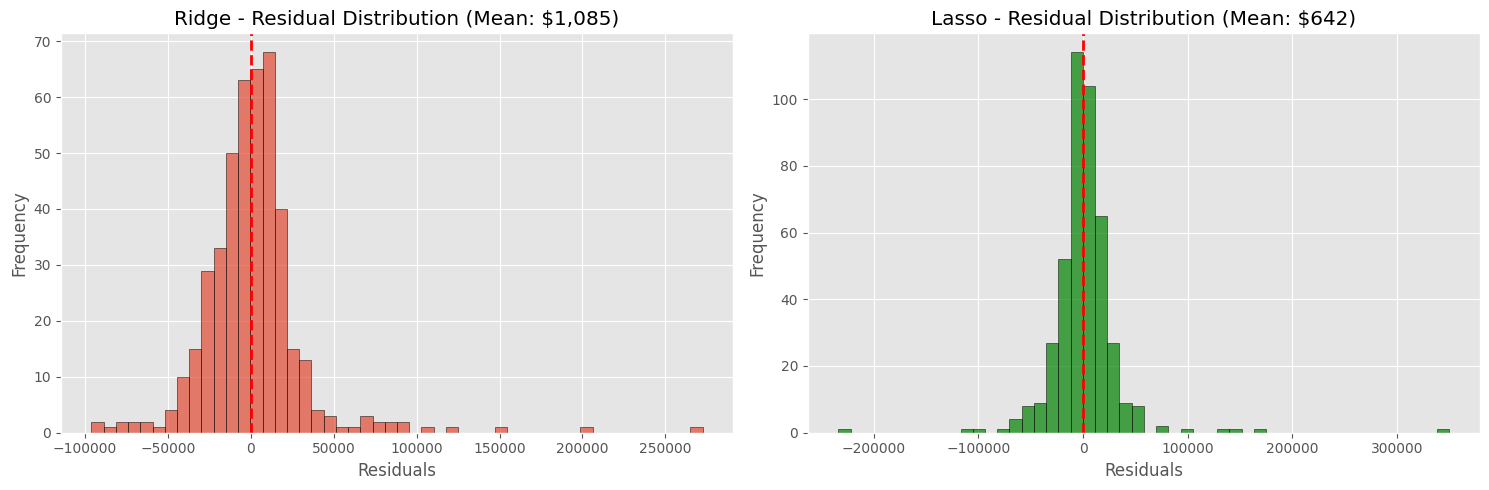

In [35]:
# Residual distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Ridge residuals
residuals_ridge = y_test - y_test_pred_ridge
axes[0].hist(residuals_ridge, bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Ridge - Residual Distribution (Mean: ${residuals_ridge.mean():,.0f})')

# Lasso residuals
residuals_lasso = y_test - y_test_pred_lasso
axes[1].hist(residuals_lasso, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].axvline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Lasso - Residual Distribution (Mean: ${residuals_lasso.mean():,.0f})')

plt.tight_layout()
plt.show()

## 10. Testing with Double Alpha Values (For Question 1)

In [36]:
# Train Ridge with double alpha
ridge_double = Ridge(alpha=2*optimal_alpha_ridge)
ridge_double.fit(X_train_scaled, y_train)

y_test_pred_ridge_double = ridge_double.predict(X_test_scaled)
test_r2_ridge_double = r2_score(y_test, y_test_pred_ridge_double)

print(f"Ridge with Alpha = {2*optimal_alpha_ridge} (Double):")
print(f"Test R² Score: {test_r2_ridge_double:.4f}")
print(f"Change in R² from optimal: {test_r2_ridge_double - test_r2_ridge:.4f}")

# Top features with double alpha
ridge_double_coef = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge_double.coef_
})
ridge_double_coef['Abs_Coefficient'] = abs(ridge_double_coef['Coefficient'])
ridge_double_coef_sorted = ridge_double_coef.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 Features with Double Alpha (Ridge):")
print(ridge_double_coef_sorted.head(10))

Ridge with Alpha = 1000 (Double):
Test R² Score: 0.8459
Change in R² from optimal: -0.0146

Top 10 Features with Double Alpha (Ridge):
                  Feature  Coefficient  Abs_Coefficient
3             OverallQual  6613.058764      6613.058764
15              GrLivArea  5090.709588      5090.709588
36                TotalSF  4692.810467      4692.810467
81   Neighborhood_NridgHt  4529.153956      4529.153956
246             PoolQC_Gd -4243.005318      4243.005318
22           TotRmsAbvGrd  4070.852907      4070.852907
25             GarageCars  4036.497149      4036.497149
80   Neighborhood_NoRidge  3927.450520      3927.450520
26             GarageArea  3537.238829      3537.238829
87   Neighborhood_StoneBr  3522.695141      3522.695141


In [37]:
# Train Lasso with double alpha
lasso_double = Lasso(alpha=2*optimal_alpha_lasso, max_iter=10000)
lasso_double.fit(X_train_scaled, y_train)

y_test_pred_lasso_double = lasso_double.predict(X_test_scaled)
test_r2_lasso_double = r2_score(y_test, y_test_pred_lasso_double)

print(f"Lasso with Alpha = {2*optimal_alpha_lasso} (Double):")
print(f"Test R² Score: {test_r2_lasso_double:.4f}")
print(f"Change in R² from optimal: {test_r2_lasso_double - test_r2_lasso:.4f}")

# Number of features selected
non_zero_coef_double = np.sum(lasso_double.coef_ != 0)
print(f"\nFeatures selected with double alpha: {non_zero_coef_double} (vs {non_zero_coef} with optimal alpha)")

# Top features with double alpha
lasso_double_coef = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso_double.coef_
})
lasso_double_coef['Abs_Coefficient'] = abs(lasso_double_coef['Coefficient'])
lasso_double_coef_sorted = lasso_double_coef[lasso_double_coef['Coefficient'] != 0].sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 Features with Double Alpha (Lasso):")
print(lasso_double_coef_sorted.head(10))

Lasso with Alpha = 200 (Double):
Test R² Score: 0.8550
Change in R² from optimal: 0.0092

Features selected with double alpha: 180 (vs 209 with optimal alpha)

Top 10 Features with Double Alpha (Lasso):
            Feature   Coefficient  Abs_Coefficient
32         PoolArea  67740.572639     67740.572639
42          HasPool -55531.106660     55531.106660
246       PoolQC_Gd -21077.848476     21077.848476
36          TotalSF  14040.295688     14040.295688
3       OverallQual  11404.728795     11404.728795
212  KitchenQual_TA -10387.569181     10387.569181
173     BsmtQual_Gd -10019.112919     10019.112919
211  KitchenQual_Gd  -9631.071218      9631.071218
15        GrLivArea   9592.992733      9592.992733
175     BsmtQual_TA  -9158.878864      9158.878864


## 11. Model Without Top 5 Features (For Question 3)

In [38]:
# Get top 5 features from Lasso
top_5_features = lasso_coef_nonzero.head(5)['Feature'].tolist()

print("Top 5 Most Important Features (to be excluded):")
for i, feat in enumerate(top_5_features, 1):
    print(f"{i}. {feat}")

# Create new dataset without top 5 features
X_train_no_top5 = X_train_scaled.drop(columns=top_5_features)
X_test_no_top5 = X_test_scaled.drop(columns=top_5_features)

print(f"\nNew feature count: {X_train_no_top5.shape[1]} (reduced from {X_train_scaled.shape[1]})")

Top 5 Most Important Features (to be excluded):
1. PoolArea
2. HasPool
3. PoolQC_Gd
4. TotalSF
5. OverallQual

New feature count: 264 (reduced from 269)


In [39]:
# Train Lasso without top 5 features
lasso_no_top5 = Lasso(alpha=optimal_alpha_lasso, max_iter=10000)
lasso_no_top5.fit(X_train_no_top5, y_train)

y_test_pred_no_top5 = lasso_no_top5.predict(X_test_no_top5)
test_r2_no_top5 = r2_score(y_test, y_test_pred_no_top5)
test_rmse_no_top5 = np.sqrt(mean_squared_error(y_test, y_test_pred_no_top5))

print(f"Lasso Model Performance WITHOUT Top 5 Features:")
print(f"Test R² Score: {test_r2_no_top5:.4f}")
print(f"Test RMSE: ${test_rmse_no_top5:,.2f}")
print(f"\nChange in R² from original model: {test_r2_no_top5 - test_r2_lasso:.4f}")
print(f"Change in RMSE from original model: ${test_rmse_no_top5 - test_rmse_lasso:,.2f}")

Lasso Model Performance WITHOUT Top 5 Features:
Test R² Score: 0.7654
Test RMSE: $40,462.94

Change in R² from original model: -0.0804
Change in RMSE from original model: $7,661.28


In [40]:
# Get new top 5 features
lasso_no_top5_coef = pd.DataFrame({
    'Feature': X_train_no_top5.columns,
    'Coefficient': lasso_no_top5.coef_
})
lasso_no_top5_coef['Abs_Coefficient'] = abs(lasso_no_top5_coef['Coefficient'])
lasso_no_top5_coef_sorted = lasso_no_top5_coef[lasso_no_top5_coef['Coefficient'] != 0].sort_values('Abs_Coefficient', ascending=False)

new_top_5_features = lasso_no_top5_coef_sorted.head(5)

print("\nNew Top 5 Most Important Features (after excluding previous top 5):")
print(new_top_5_features)


New Top 5 Most Important Features (after excluding previous top 5):
              Feature   Coefficient  Abs_Coefficient
117  RoofMatl_CompShg  77564.765588     77564.765588
121  RoofMatl_Tar&Grv  53645.594454     53645.594454
123  RoofMatl_WdShngl  39080.195778     39080.195778
122  RoofMatl_WdShake  31605.671238     31605.671238
14          GrLivArea  20772.365655     20772.365655


## 12. Key Findings and Conclusions

In [41]:
print("="*80)
print("KEY FINDINGS AND RECOMMENDATIONS")
print("="*80)

print("\n1. OPTIMAL ALPHA VALUES:")
print(f"   - Ridge Regression: {optimal_alpha_ridge}")
print(f"   - Lasso Regression: {optimal_alpha_lasso}")

print("\n2. MODEL PERFORMANCE:")
print(f"   - Ridge Test R²: {test_r2_ridge:.4f}")
print(f"   - Lasso Test R²: {test_r2_lasso:.4f}")
print(f"   - Ridge Test RMSE: ${test_rmse_ridge:,.2f}")
print(f"   - Lasso Test RMSE: ${test_rmse_lasso:,.2f}")

print("\n3. TOP 5 MOST IMPORTANT PREDICTORS (Lasso):")
for i, row in enumerate(lasso_coef_nonzero.head(5).itertuples(), 1):
    print(f"   {i}. {row.Feature}: {row.Coefficient:,.2f}")

print("\n4. FEATURE SELECTION:")
print(f"   - Lasso selected {non_zero_coef} features out of {len(lasso_optimal.coef_)}")
print(f"   - This represents {non_zero_coef/len(lasso_optimal.coef_)*100:.1f}% of total features")

print("\n5. RECOMMENDATION:")
if test_r2_lasso >= test_r2_ridge:
    print(f"   - Lasso Regression is recommended due to:")
    print(f"     • Similar or better performance (R² = {test_r2_lasso:.4f})")
    print(f"     • Automatic feature selection ({non_zero_coef} features)")
    print(f"     • Better interpretability and simpler model")
else:
    print(f"   - Ridge Regression is recommended due to:")
    print(f"     • Better performance (R² = {test_r2_ridge:.4f})")
    print(f"     • More stable predictions")

print("\n" + "="*80)

KEY FINDINGS AND RECOMMENDATIONS

1. OPTIMAL ALPHA VALUES:
   - Ridge Regression: 500
   - Lasso Regression: 100

2. MODEL PERFORMANCE:
   - Ridge Test R²: 0.8605
   - Lasso Test R²: 0.8458
   - Ridge Test RMSE: $31,201.24
   - Lasso Test RMSE: $32,801.66

3. TOP 5 MOST IMPORTANT PREDICTORS (Lasso):
   1. PoolArea: 85,370.63
   2. HasPool: -72,222.09
   3. PoolQC_Gd: -23,000.14
   4. TotalSF: 16,186.32
   5. OverallQual: 10,948.49

4. FEATURE SELECTION:
   - Lasso selected 209 features out of 269
   - This represents 77.7% of total features

5. RECOMMENDATION:
   - Ridge Regression is recommended due to:
     • Better performance (R² = 0.8605)
     • More stable predictions



## 13. Save Key Results

In [42]:
# Create output directory if it doesn't exist
import os
os.makedirs('output', exist_ok=True)

# Save model comparison to output folder
comparison.to_csv('output/model_comparison.csv', index=False)

# Save top features to output folder
lasso_coef_nonzero.to_csv('output/lasso_feature_importance.csv', index=False)
ridge_coef_sorted.to_csv('output/ridge_feature_importance.csv', index=False)

print("Results saved successfully to output/ folder!")
print("- output/model_comparison.csv")
print("- output/lasso_feature_importance.csv")
print("- output/ridge_feature_importance.csv")

Results saved successfully to output/ folder!
- output/model_comparison.csv
- output/lasso_feature_importance.csv
- output/ridge_feature_importance.csv
